In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Index: Recall@1

## Gathering measurements

In [3]:
n_lists_arr = []
n_probe_arr = []
recall_at_1_arr = []
with open('measurements.log', 'r') as f:
    for line in f:
        if line.startswith('Inserted'):
          continue
        value = line.strip().split(' ')[1]
        if line.startswith('n_lists'):
            n_lists_arr.append(int(value))
        elif line.startswith('n_probe'):
            n_probe_arr.append(int(value))
        elif line.startswith('Recall@1'):
            recall_at_1_arr.append(float(value))
measurements = list(zip(n_lists_arr, n_probe_arr, recall_at_1_arr))
def get_plot_data(n_lists):
    recall_at_1 = [x[2] for x in measurements if x[0] == n_lists]
    n_probe = [x[1] for x in measurements if x[0] == n_lists]
    return n_probe, recall_at_1

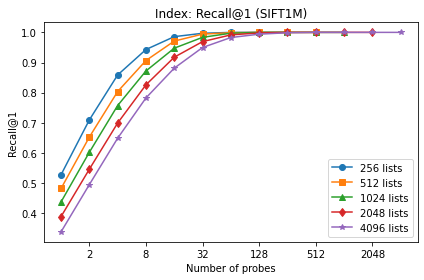

In [4]:
import matplotlib.ticker as ticker
from cycler import cycler
fig, ax = plt.subplots(tight_layout=True)

marker_cycler = cycler(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
                         '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
                         '#bcbd22', '#17becf'], marker=['o', 's', '^', 'd', '*', '+', 'x', 'v', 'p', 'h'])
ax.set_prop_cycle(marker_cycler)

bars = []
for n_lists in sorted(set(n_lists_arr)):
    bars.append(ax.plot(
        get_plot_data(n_lists)[0],
        get_plot_data(n_lists)[1],  
        label=f"{n_lists} lists"
    ))
ax.set_title('Index: Recall@1 (SIFT1M)')

ax.set_xlabel("Number of probes")
ax.set_ylabel("Recall@1")

ax.set_xscale("log")
ax.xaxis.set_major_locator(ticker.LogLocator(base=2))
ax.xaxis.set_minor_locator(ticker.NullLocator())
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=False))

ax.legend()
plt.savefig('index-recall-at-1.jpg', dpi=300)
plt.show()


In [5]:
round(223454321.23 / 1024 / 1024,2), round(8240769.92 / 1024 / 1024,2)

(213.1, 7.86)